# Sales Prediction using Python

# Import necessary libraries

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [38]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# Load the dataset

In [39]:
df=pd.read_csv("C:/Users/ELCOT/Downloads/data_prac/Advertising.csv")

In [40]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [41]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [42]:
df.shape

(200, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [13]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [43]:
df.duplicated().sum()

np.int64(0)

<Axes: >

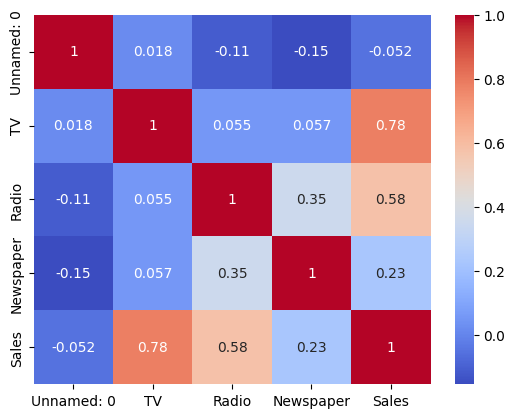

In [44]:
numeric_df = df.select_dtypes(include=['float64', 'int64']) 
corr_matrix = numeric_df.corr() 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


# scaler step

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[['TV', 'Radio', 'Newspaper']] = scaler.fit_transform(df[['TV', 'Radio', 'Newspaper']])


In [46]:
# Features (independent variables)
X = df[['TV', 'Radio', 'Newspaper']]

# Target (dependent variable)
y = df['Sales']


# Split the data into training and testing sets

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 160
Testing set size: 40


Model Selecting

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [3.83060599 2.80191171 0.05998274]
Model Intercept: 14.042004239811021


In [49]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

R-squared: 0.90
Mean Squared Error: 3.17
Mean Absolute Error: 1.46


Polynomial Feature Transformation

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

poly = PolynomialFeatures(degree=2)  
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)



LinearRegression()

Evaluate the Model

In [51]:

y_pred_poly = poly_model.predict(X_test_poly)


In [52]:

r2_poly = r2_score(y_test, y_pred_poly)
print(f"R-squared: {r2_poly:.2f}")

mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Mean Squared Error: {mse_poly:.2f}")

mae_poly = mean_absolute_error(y_test, y_pred_poly)
print(f"Mean Absolute Error: {mae_poly:.2f}")


R-squared: 0.99
Mean Squared Error: 0.41
Mean Absolute Error: 0.53


## Why I Used Polynomial Regression

- **Linear regression** might not capture non-linear relationships between features and target variables.
- **Polynomial regression** helps model **curved, non-linear relationships** by adding polynomial terms (e.g., squared or cubic terms).
- It **improves accuracy** and **reduces prediction errors** by better fitting the data.

## Results

- **R-squared**: 0.99 (99% of the variance in Sales is explained)
- **Mean Squared Error (MSE)**: 0.41 (low error in predictions)
- **Mean Absolute Error (MAE)**: 0.53 (average error of 0.53 units in Sales)

Polynomial regression gave a **better fit** than linear regression, improving **prediction accuracy** with low errors.


# Predict a new sample

In [53]:
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


new_data = np.array([[120, 30, 50]]) 

new_data_scaled = scaler.transform(new_data)

new_data_poly = poly.transform(new_data_scaled)

new_prediction = poly_model.predict(new_data_poly)

print(f"Predicted Sales: {new_prediction[0]}")


Predicted Sales: 14.686740504179895
